# Data Cleaning

---


In [3]:
DATA_PATH = r'..\data\processed\01-relevant_data.csv'
OUTPUT_DATA_PATH = r'..\data\processed\02-Cleaned_data.csv'

In [4]:
# Functions
def correct_d(x):
    if x == 'Less than 1 year':
        return 0
    elif x == 'More than 50 years':
        return 51
    else:
        return x

## Importing


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
# Set the maximum number of rows and columns to display
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv(DATA_PATH, index_col=0)

In [7]:
df.head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,Country,EdLevel,YearsCode,YearsCodePro,DevType
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)"
2,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,NaN,NaN,NaN,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end"
3,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,PostgreSQL;Redis,Cloudflare;Heroku,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,Node.js;Ruby on Rails;Vue.js,NaN,NaN,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end"
4,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Elasticsearch;MongoDB;PostgreSQL;Redis;Supabase,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Amazon Web Services (AWS);Cloudflare;Digital O...,Express;Gatsby;NestJS;Next.js;Node.js;React,Express;NestJS;Next.js;Node.js;React;Remix;Vue.js,NaN,NaN,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack"


### 1) missing values


In [8]:
df.isna().sum() / len(df) * 100

LanguageHaveWorkedWith     2.291891
LanguageWantToWorkWith     9.502826
DatabaseHaveWorkedWith    17.658997
DatabaseWantToWorkWith    31.701875
PlatformHaveWorkedWith    28.655364
PlatformWantToWorkWith    42.469501
WebframeHaveWorkedWith    24.943936
WebframeWantToWorkWith    36.377601
MiscTechHaveWorkedWith    36.065886
MiscTechWantToWorkWith    47.470398
Country                    1.357867
EdLevel                    1.357867
YearsCode                  1.961114
YearsCodePro              25.843201
DevType                   13.805167
dtype: float64

<Axes: >

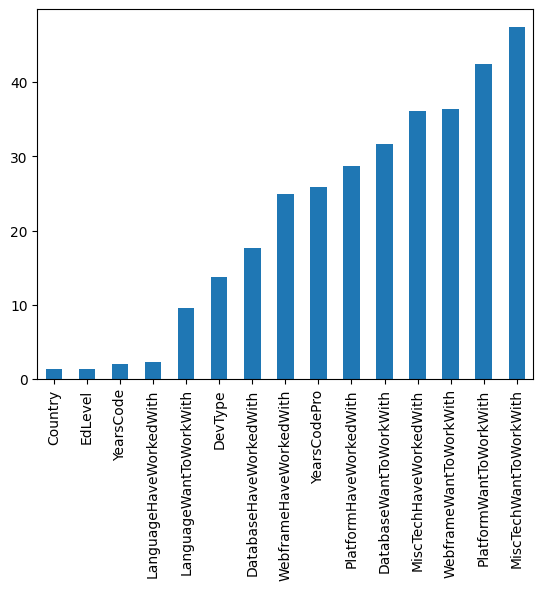

In [9]:
missing_v = df.isna().sum() / len(df) * 100
missing_v.sort_values().plot(kind='bar')

### **1)DevType**


In [10]:
df[df['DevType'].isnull()]

,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,Country,EdLevel,YearsCode,YearsCodePro,DevType
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,C#;HTML/CSS;JavaScript;PHP;PowerShell;SQL;Type...,C#;HTML/CSS;JavaScript;PowerShell;Python;Solid...,MongoDB;MySQL,Cloud Firestore;MongoDB;MySQL,Firebase;Google Cloud;Microsoft Azure;Netlify;...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Angular;AngularJS;Blazor;Express;Next.js;Node....,Angular;AngularJS;Blazor;Express;Next.js;Node....,Xamarin,Xamarin,Sweden,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,NaN,NaN
52,C++;HTML/CSS;JavaScript;PHP;Python;SQL,C++;HTML/CSS;JavaScript;PHP;SQL,MariaDB,MariaDB,NaN,NaN,Flask,NaN,NaN,NaN,Poland,"Secondary school (e.g. American high school, G...",7,NaN,NaN
53,Go;HTML/CSS;Java;JavaScript;Python;SQL,Go;Python,MySQL;SQLite,NaN,NaN,NaN,NaN,NaN,NumPy;Opencv;Pandas,NaN,United Kingdom of Great Britain and Northern I...,"Secondary school (e.g. American high school, G...",7,NaN,NaN
57,Haskell;HTML/CSS;Java;Python,C#;C++;Haskell;HTML/CSS;Java;Python,NaN,NaN,NaN,NaN,NaN,NaN,Keras;NumPy;TensorFlow,NumPy;Pandas,United Kingdom of Great Britain and Northern I...,"Secondary school (e.g. American high school, G...",4,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89142,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Cloud Firestore;Dynamodb;MariaDB,Cloud Firestore;Cockroachdb;Dynamodb;Elasticse...,Amazon Web Services (AWS);Digital Ocean;Fireba...,Amazon Web Services (AWS);Cloudflare;Digital O...,Angular;AngularJS;Next.js;Node.js;React,Django;Next.js;Node.js;Nuxt.js;React;Svelte;Vu...,Pandas,Electron;Flutter;React Native;SwiftUI;Torch/Py...,Canada,"Secondary school (e.g. American high school, G...",2,NaN,NaN
89159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89168,Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,Bash/Shell (all shells);Go;Haskell;HTML/CSS;Ru...,Firebird;MariaDB;MySQL;PostgreSQL;SQLite,Firebird;PostgreSQL;SQLite,Amazon Web Services (AWS);Firebase;Netlify,Firebase,Angular;AngularJS;Deno;Django;Express;Flask;jQ...,Solid.js,Qt,Tauri,France,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,NaN,NaN
89176,HTML/CSS;Java;JavaScript;PHP;Python;SQL;TypeSc...,HTML/CSS;TypeScript,MySQL,Firebase Realtime Database;MongoDB;PostgreSQL,NaN,NaN,Angular;Express;jQuery;Node.js;React,Express;Node.js;React,TensorFlow,NaN,Greece,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,NaN,NaN


### - DevType column is the most important column in our data we can fill nan values in it using the clastring techniques but we notice that there are a lot of missing values in other columns if DevType == NAN

### - So we will drop the rows with nan values in DevType


In [11]:
df = df[~(df['DevType'].isnull())]

### **2)YearsCode**


<Axes: >

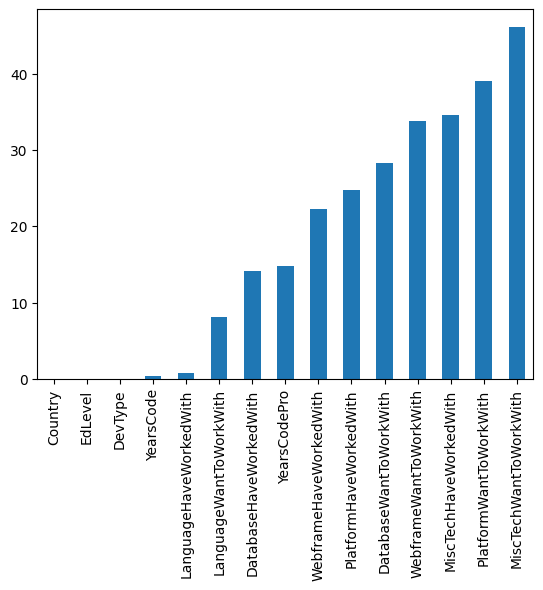

In [12]:
missing_v = df.isna().sum() / len(df) * 100
missing_v.sort_values().plot(kind='bar')

In [13]:
len(df[df['YearsCode'].isnull()])

286

In [14]:
df = df[~(df['YearsCode'].isnull())]

### **3)LanguageHaveWorkedWith**


<Axes: >

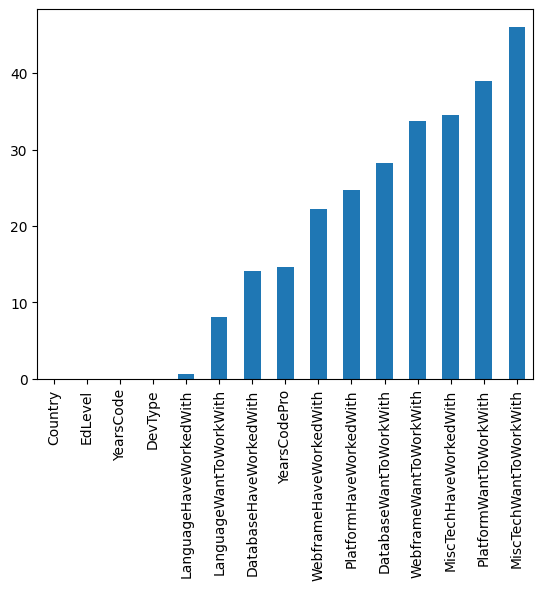

In [15]:
missing_v = df.isna().sum() / len(df) * 100
missing_v.sort_values().plot(kind='bar')

In [16]:
df[df['LanguageHaveWorkedWith'].isnull()].head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,Country,EdLevel,YearsCode,YearsCodePro,DevType
329,NaN,NaN,MySQL;PostgreSQL,MongoDB;MySQL;PostgreSQL,NaN,NaN,jQuery;Vue.js,React;Svelte,NaN,NaN,Italy,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",20,15,"Developer, full-stack"
490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25,25,Engineering manager
521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Brazil,Some college/university study without earning ...,10,NaN,Academic researcher
578,NaN,NaN,PostgreSQL,NaN,Microsoft Azure,Microsoft Azure,NaN,NaN,NaN,NaN,Nigeria,"Secondary school (e.g. American high school, G...",4,NaN,"Developer, back-end"
628,NaN,NaN,NaN,NaN,Amazon Web Services (AWS),Amazon Web Services (AWS),Node.js;Ruby on Rails,Node.js,NaN,NaN,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22,20,"Developer, full-stack"


In [17]:
df = df[~(df['LanguageHaveWorkedWith'].isnull())]

<Axes: >

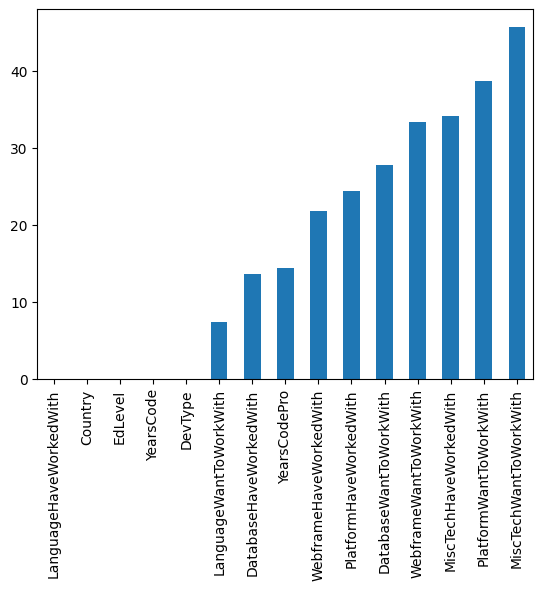

In [18]:
missing_v = df.isna().sum() / len(df) * 100
missing_v.sort_values().plot(kind='bar')

In [19]:
df.isna().sum().sort_values() / len(df) * 100

LanguageHaveWorkedWith     0.000000
Country                    0.000000
EdLevel                    0.000000
YearsCode                  0.000000
DevType                    0.000000
LanguageWantToWorkWith     7.421382
DatabaseHaveWorkedWith    13.655606
YearsCodePro              14.422066
WebframeHaveWorkedWith    21.835560
PlatformHaveWorkedWith    24.382099
DatabaseWantToWorkWith    27.808162
WebframeWantToWorkWith    33.358751
MiscTechHaveWorkedWith    34.201462
PlatformWantToWorkWith    38.672697
MiscTechWantToWorkWith    45.731226
dtype: float64

---


## we will put threshold of 25% and we will drop the columns more than this threshold in missing values


In [20]:
missing_v[missing_v > 25].index

Index(['DatabaseWantToWorkWith', 'PlatformWantToWorkWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith'],
      dtype='object')

In [21]:
df = df.drop(['DatabaseWantToWorkWith', 'PlatformWantToWorkWith',
              'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
              'MiscTechWantToWorkWith'], axis=1)

In [22]:
# Drop columns with more than 30% missing values
threshold = 0.3
df.dropna(axis=1, thresh=(1 - threshold) * len(df))

,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,Country,EdLevel,YearsCode,YearsCodePro,DevType
1,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)"
2,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end"
3,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end"
4,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack"
5,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,BigQuery;Cloud Firestore;PostgreSQL;Redis,Amazon Web Services (AWS);Cloudflare;Google Cloud,Angular;Express;NestJS;Node.js,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21,21,"Developer, back-end"
...,...,...,...,...,...,...,...,...,...,...
89178,JavaScript;TypeScript,Go;JavaScript;Python;TypeScript,Dynamodb,Amazon Web Services (AWS),Express;Node.js;Spring Boot,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25,22,"Developer, full-stack"
89179,HTML/CSS;Java;JavaScript;SQL;TypeScript,Bash/Shell (all shells);C;Go;HTML/CSS;JavaScri...,MongoDB;MySQL;PostgreSQL;SQLite,Digital Ocean;Firebase;Google Cloud;Heroku;Vercel,Angular;AngularJS;Express;jQuery;Node.js;Nuxt....,Brazil,"Associate degree (A.A., A.S., etc.)",20,5,"Developer, front-end"
89180,Dart;Java;Python;SQL,Java;JavaScript;Python;SQL;TypeScript,PostgreSQL,NaN,Spring Boot,Romania,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,NaN,"Developer, back-end"
89182,Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);HTML/CSS;JavaScript;Po...,MariaDB;Microsoft SQL Server;MongoDB;MySQL;Red...,Amazon Web Services (AWS);Cloudflare;Google Cl...,Express;Next.js;Node.js;React;WordPress,Switzerland,"Secondary school (e.g. American high school, G...",3,NaN,System administrator


<Axes: >

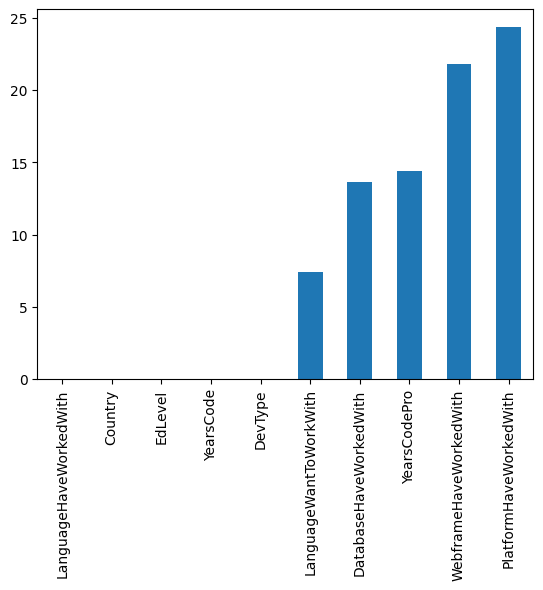

In [23]:
missing_v = df.isna().sum() / len(df) * 100
missing_v.sort_values().plot(kind='bar')

### **Fill YearsCodePro**


but first we need to correct data type to int


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76064 entries, 1 to 89183
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   LanguageHaveWorkedWith  76064 non-null  object
 1   LanguageWantToWorkWith  70419 non-null  object
 2   DatabaseHaveWorkedWith  65677 non-null  object
 3   PlatformHaveWorkedWith  57518 non-null  object
 4   WebframeHaveWorkedWith  59455 non-null  object
 5   Country                 76064 non-null  object
 6   EdLevel                 76064 non-null  object
 7   YearsCode               76064 non-null  object
 8   YearsCodePro            65094 non-null  object
 9   DevType                 76064 non-null  object
dtypes: object(10)
memory usage: 6.4+ MB


In [25]:
df['YearsCode'] = df['YearsCode'].apply(lambda x: correct_d(x))

In [26]:
df['YearsCodePro'] = df['YearsCodePro'].apply(lambda x: correct_d(x))

In [27]:
df['YearsCode'] = df['YearsCode'].astype(float)
df['YearsCodePro'] = df['YearsCodePro'].astype(float)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76064 entries, 1 to 89183
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LanguageHaveWorkedWith  76064 non-null  object 
 1   LanguageWantToWorkWith  70419 non-null  object 
 2   DatabaseHaveWorkedWith  65677 non-null  object 
 3   PlatformHaveWorkedWith  57518 non-null  object 
 4   WebframeHaveWorkedWith  59455 non-null  object 
 5   Country                 76064 non-null  object 
 6   EdLevel                 76064 non-null  object 
 7   YearsCode               76064 non-null  float64
 8   YearsCodePro            65094 non-null  float64
 9   DevType                 76064 non-null  object 
dtypes: float64(2), object(8)
memory usage: 6.4+ MB


In [29]:
df.groupby('EdLevel')['YearsCodePro'].mean()

EdLevel
Associate degree (A.A., A.S., etc.)                                                   11.288004
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          10.166783
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       11.893161
Primary/elementary school                                                              9.582873
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        14.178070
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     9.921641
Some college/university study without earning a degree                                12.421867
Something else                                                                        10.864295
Name: YearsCodePro, dtype: float64

## You can fill the missing values in the 'YearsCodePro' column with the mean values calculated based on the 'EdLevel' groups


In [30]:
# Calculate the mean for each 'EdLevel' group
edlevel_means = df.groupby('EdLevel')['YearsCodePro'].mean()

# Fill missing values with the corresponding mean for each 'EdLevel' group
df['YearsCodePro'] = df.apply(
    lambda row: round(edlevel_means[row['EdLevel']], 0) if pd.isna(
        row['YearsCodePro']) else row['YearsCodePro'],
    axis=1
)

---


<Axes: >

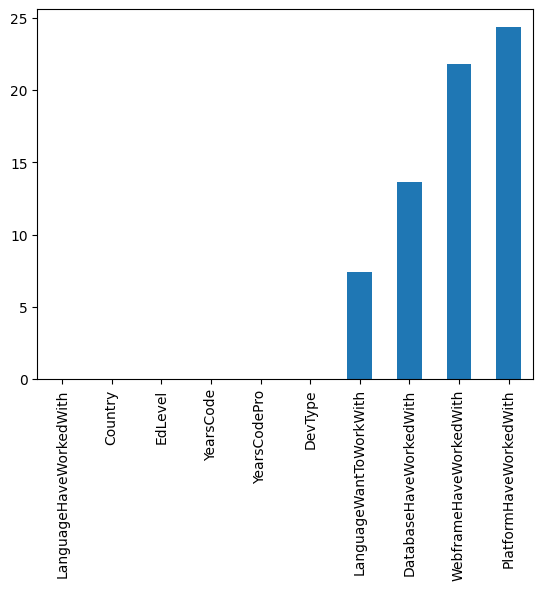

In [31]:
missing_v = df.isna().sum() / len(df) * 100
missing_v.sort_values().plot(kind='bar')

In [32]:
df

,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,Country,EdLevel,YearsCode,YearsCodePro,DevType
1,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18.0,9.0,"Senior Executive (C-Suite, VP, etc.)"
2,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,NaN,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27.0,23.0,"Developer, back-end"
3,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12.0,7.0,"Developer, front-end"
4,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,4.0,"Developer, full-stack"
5,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,BigQuery;Cloud Firestore;PostgreSQL;Redis,Amazon Web Services (AWS);Cloudflare;Google Cloud,Angular;Express;NestJS;Node.js,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21.0,21.0,"Developer, back-end"
...,...,...,...,...,...,...,...,...,...,...
89178,JavaScript;TypeScript,Go;JavaScript;Python;TypeScript,Dynamodb,Amazon Web Services (AWS),Express;Node.js;Spring Boot,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25.0,22.0,"Developer, full-stack"
89179,HTML/CSS;Java;JavaScript;SQL;TypeScript,Bash/Shell (all shells);C;Go;HTML/CSS;JavaScri...,MongoDB;MySQL;PostgreSQL;SQLite,Digital Ocean;Firebase;Google Cloud;Heroku;Vercel,Angular;AngularJS;Express;jQuery;Node.js;Nuxt....,Brazil,"Associate degree (A.A., A.S., etc.)",20.0,5.0,"Developer, front-end"
89180,Dart;Java;Python;SQL,Java;JavaScript;Python;SQL;TypeScript,PostgreSQL,NaN,Spring Boot,Romania,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,10.0,"Developer, back-end"
89182,Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);HTML/CSS;JavaScript;Po...,MariaDB;Microsoft SQL Server;MongoDB;MySQL;Red...,Amazon Web Services (AWS);Cloudflare;Google Cl...,Express;Next.js;Node.js;React;WordPress,Switzerland,"Secondary school (e.g. American high school, G...",3.0,10.0,System administrator


## Now we fill all the missing values as “You don't have” so as not to lose any more data


In [33]:
df = df.fillna("Don't have")

<Axes: >

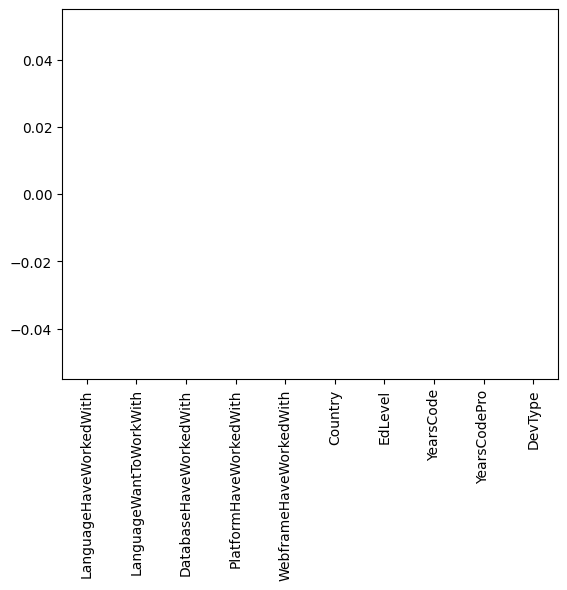

In [34]:
missing_v = df.isna().sum() / len(df) * 100
missing_v.sort_values().plot(kind='bar')

### **Done**


### Conclusion

In addressing missing values, we took several steps to ensure the integrity of our dataset. We identified and handled missing values in critical columns, such as 'DevType,' 'YearsCode,' and 'LanguageHaveWorkedWith.' Additionally, we dropped columns with a substantial percentage of missing values to preserve data quality.

To maintain the completeness of our dataset, we used a threshold of 25% to drop columns. For the 'YearsCodePro' column, we corrected data types and filled missing values with the mean values based on 'EdLevel' groups, providing a more accurate representation.

Finally, we filled the remaining missing values with "Don't have" to avoid further data loss.


### 2) correct data types


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76064 entries, 1 to 89183
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   LanguageHaveWorkedWith  76064 non-null  object 
 1   LanguageWantToWorkWith  76064 non-null  object 
 2   DatabaseHaveWorkedWith  76064 non-null  object 
 3   PlatformHaveWorkedWith  76064 non-null  object 
 4   WebframeHaveWorkedWith  76064 non-null  object 
 5   Country                 76064 non-null  object 
 6   EdLevel                 76064 non-null  object 
 7   YearsCode               76064 non-null  float64
 8   YearsCodePro            76064 non-null  float64
 9   DevType                 76064 non-null  object 
dtypes: float64(2), object(8)
memory usage: 6.4+ MB


### 3)check for duplication


In [36]:
df[df.duplicated()]

,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,Country,EdLevel,YearsCode,YearsCodePro,DevType
37335,C++;Java,C++;Java;JavaScript,Don't have,Amazon Web Services (AWS);Microsoft Azure,Spring Boot,India,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,4.0,"Developer, back-end"
49545,SQL,SQL,Microsoft SQL Server,Microsoft Azure,Don't have,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10.0,10.0,Database administrator
54562,SQL,SQL,Microsoft SQL Server,Microsoft Azure,Don't have,Ukraine,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",10.0,10.0,Database administrator
56753,C;C#;C++,C;C++,Don't have,Don't have,Don't have,Czech Republic,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11.0,3.0,"Developer, desktop or enterprise applications"


We will not remove duplicate rows because there may be more than one person with the same skills


### 4)Outliers


In [37]:
df.head()

,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,Country,EdLevel,YearsCode,YearsCodePro,DevType
1,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18.0,9.0,"Senior Executive (C-Suite, VP, etc.)"
2,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,Don't have,Amazon Web Services (AWS);Google Cloud;OpenSta...,Don't have,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27.0,23.0,"Developer, back-end"
3,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12.0,7.0,"Developer, front-end"
4,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,4.0,"Developer, full-stack"
5,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,BigQuery;Cloud Firestore;PostgreSQL;Redis,Amazon Web Services (AWS);Cloudflare;Google Cloud,Angular;Express;NestJS;Node.js,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21.0,21.0,"Developer, back-end"


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
YearsCode,76064.0,14.935725,10.336243,0.0,7.0,12.0,20.0,51.0
YearsCodePro,76064.0,11.101428,8.405660,0.0,5.0,10.0,14.0,51.0


In [39]:
df[~(df['YearsCode'] == 0)]

,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,PlatformHaveWorkedWith,WebframeHaveWorkedWith,Country,EdLevel,YearsCode,YearsCodePro,DevType
1,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18.0,9.0,"Senior Executive (C-Suite, VP, etc.)"
2,Bash/Shell (all shells);Go,Haskell;OCaml;Rust,Don't have,Amazon Web Services (AWS);Google Cloud;OpenSta...,Don't have,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27.0,23.0,"Developer, back-end"
3,Bash/Shell (all shells);HTML/CSS;JavaScript;PH...,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,PostgreSQL;Redis,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12.0,7.0,"Developer, front-end"
4,HTML/CSS;JavaScript;TypeScript,HTML/CSS;JavaScript;Python;Rust;TypeScript,BigQuery;Elasticsearch;MongoDB;PostgreSQL,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,Philippines,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6.0,4.0,"Developer, full-stack"
5,Bash/Shell (all shells);HTML/CSS;JavaScript;Ru...,Go;Rust,BigQuery;Cloud Firestore;PostgreSQL;Redis,Amazon Web Services (AWS);Cloudflare;Google Cloud,Angular;Express;NestJS;Node.js,United Kingdom of Great Britain and Northern I...,Some college/university study without earning ...,21.0,21.0,"Developer, back-end"
...,...,...,...,...,...,...,...,...,...,...
89178,JavaScript;TypeScript,Go;JavaScript;Python;TypeScript,Dynamodb,Amazon Web Services (AWS),Express;Node.js;Spring Boot,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25.0,22.0,"Developer, full-stack"
89179,HTML/CSS;Java;JavaScript;SQL;TypeScript,Bash/Shell (all shells);C;Go;HTML/CSS;JavaScri...,MongoDB;MySQL;PostgreSQL;SQLite,Digital Ocean;Firebase;Google Cloud;Heroku;Vercel,Angular;AngularJS;Express;jQuery;Node.js;Nuxt....,Brazil,"Associate degree (A.A., A.S., etc.)",20.0,5.0,"Developer, front-end"
89180,Dart;Java;Python;SQL,Java;JavaScript;Python;SQL;TypeScript,PostgreSQL,Don't have,Spring Boot,Romania,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,10.0,"Developer, back-end"
89182,Bash/Shell (all shells);C#;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);HTML/CSS;JavaScript;Po...,MariaDB;Microsoft SQL Server;MongoDB;MySQL;Red...,Amazon Web Services (AWS);Cloudflare;Google Cl...,Express;Next.js;Node.js;React;WordPress,Switzerland,"Secondary school (e.g. American high school, G...",3.0,10.0,System administrator


<Axes: xlabel='YearsCode', ylabel='YearsCodePro'>

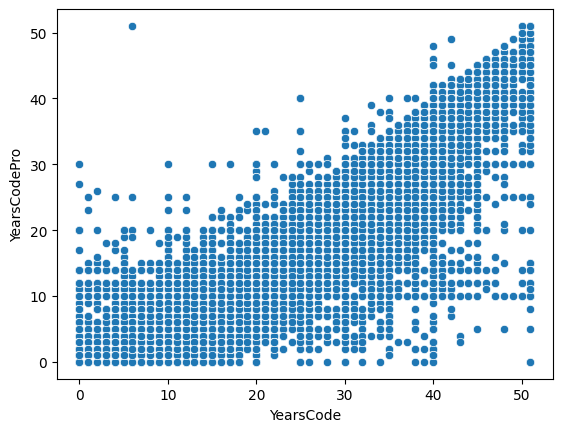

In [40]:
sns.scatterplot(x=df['YearsCode'], y=df['YearsCodePro'])

In [41]:
df = df[~((df['YearsCodePro'] > 50) & (df['YearsCode'] < 10))]

<Axes: xlabel='YearsCode', ylabel='YearsCodePro'>

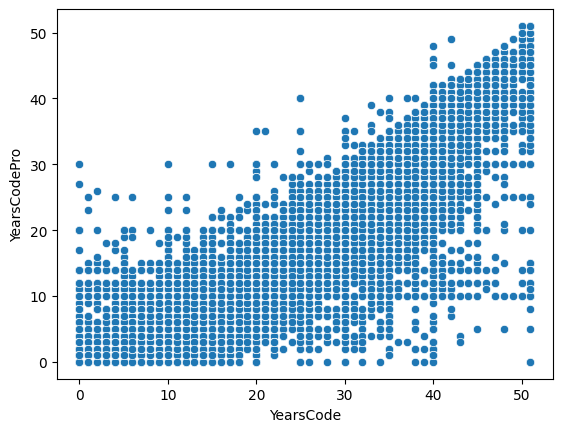

In [42]:
sns.scatterplot(x=df['YearsCode'], y=df['YearsCodePro'])

<Axes: >

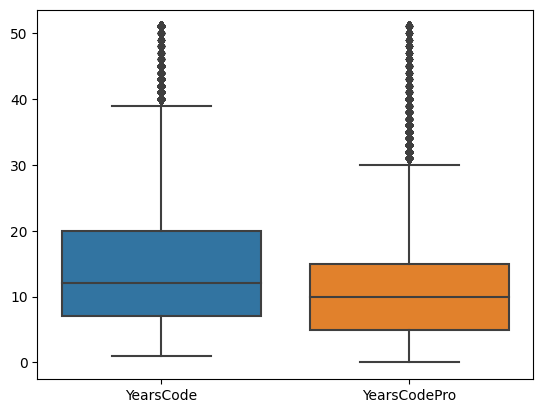

In [43]:
sns.boxplot(df[~(df['YearsCode'] == 0)])

<Axes: ylabel='Count'>

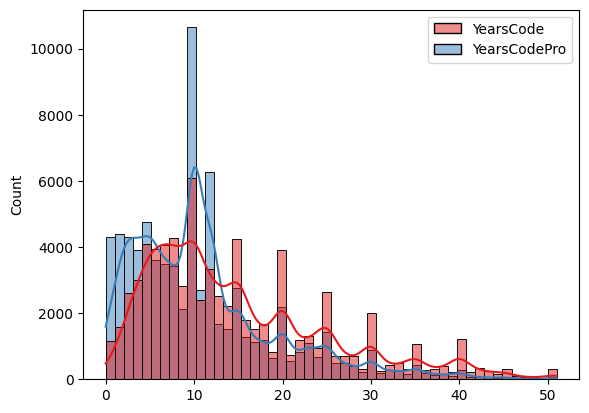

In [44]:
sns.histplot(df, bins=50, kde=True, palette='Set1')

In [45]:
# import pandas as pd
# from scipy import stats


# # Calculate Z-scores for numerical columns
# z_scores = stats.zscore(df[['YearsCode', 'YearsCodePro']])

# # Define a threshold for identifying outliers (e.g., 3 or -3)
# threshold = 3

# # Identify outliers based on the threshold
# outliers = (abs(z_scores) > threshold).any(axis=1)

# # Print or use the rows with outliers
# df[outliers][['YearsCode' , 'YearsCodePro']]

In [46]:
# sns.histplot(stats.zscore(df[['YearsCode', 'YearsCodePro']]))

<Axes: xlabel='YearsCode', ylabel='YearsCodePro'>

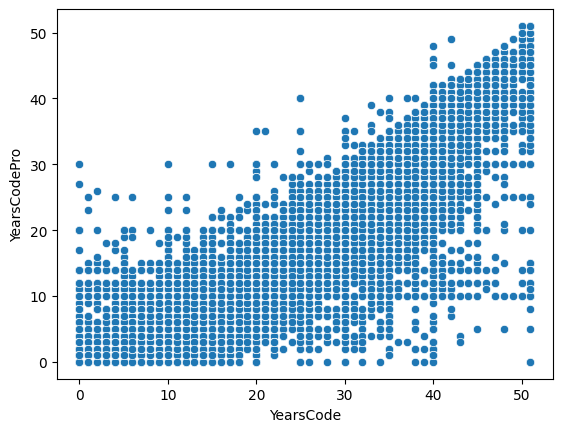

In [47]:
sns.scatterplot(x=df['YearsCode'], y=df['YearsCodePro'])

From this scatter plot i got some insights. In a logical and real-world scenario, the number of years a person has been coding professionally (YearsCodePro) should not be greater than the total number of years they have been coding (YearsCode). The YearsCodePro represents the time spent coding specifically in a professional setting, excluding any coding done during education or personal projects.

If we have instances where YearsCodePro is greater than YearsCode, it may indicate a potential issue or inconsistency in the data. In such cases, it might be reasonable to investigate the data further and, if necessary, correct or remove the problematic entries.

so let's check on that


In [48]:
df[df['YearsCodePro'] > df['YearsCode']][['YearsCode', 'YearsCodePro']]

,YearsCode,YearsCodePro
9,6.0,10.0
24,0.0,10.0
35,5.0,10.0
58,4.0,10.0
69,8.0,10.0
...,...,...
89147,4.0,10.0
89149,0.0,10.0
89151,2.0,10.0
89180,5.0,10.0


Indeed, we obtained some illogical values that may be an error in data entry so we should drop them


In [49]:
df = df[~(df['YearsCodePro'] > df['YearsCode'])]

<Axes: xlabel='YearsCode', ylabel='YearsCodePro'>

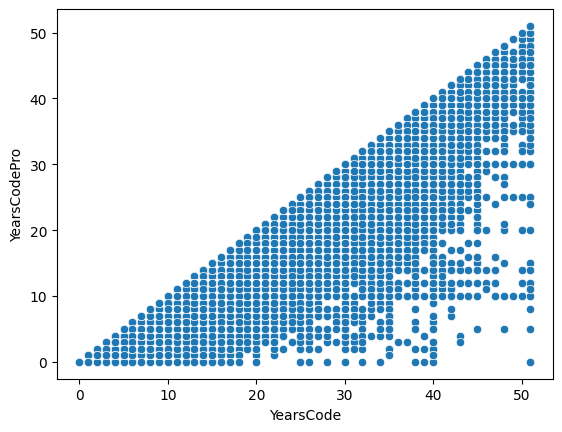

In [50]:
sns.scatterplot(x=df['YearsCode'], y=df['YearsCodePro'])

<Axes: >

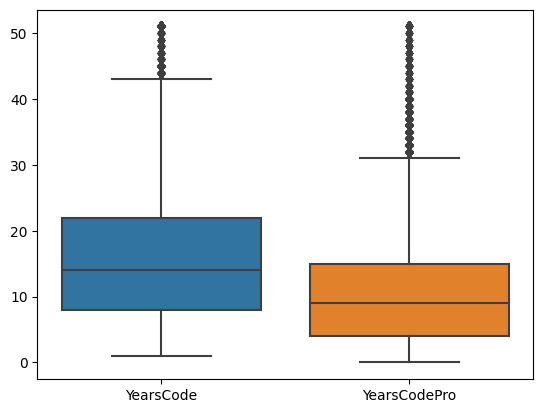

In [51]:
sns.boxplot(df[~(df['YearsCode'] == 0)])

<Axes: ylabel='Count'>

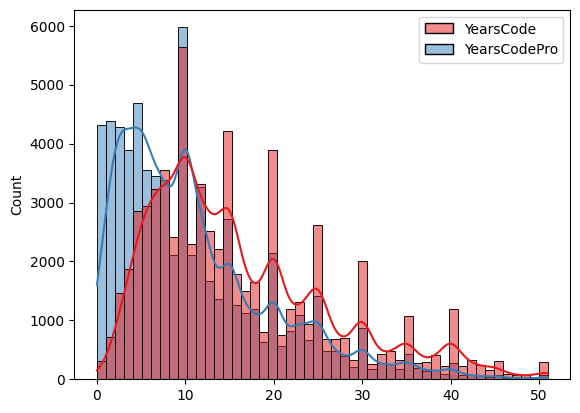

In [52]:
sns.histplot(df, bins=50, kde=True, palette='Set1')

we still have some outliers but maybe indicate to the represent experienced professionals so i keep them


---


In [53]:
df.to_csv(OUTPUT_DATA_PATH, index=False)